# 1. Exploratory Data Analysis

In te following notebook, we will explore the instacart data, in order to 1) understand better how the data looks like and 2) to prepare the upcoming steps

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile
from subprocess import check_output
import zipfile, os

color = sns.color_palette()
sns.set_theme()
%matplotlib inline
plt.style.use("fivethirtyeight")


## 1.1 Extracting the archive and loading the data

In [2]:
# Create a ZipFile Object and load sample.zip in it
#with ZipFile('../instacart-market-basket-analysis.zip', 'r') as zipObj:
   # Extract all the contents of zip file in data directory
   #zipObj.extractall("temp")


In [3]:
#working_directory = '/home/lmo/NOVA_SBE/2487-ML/04_groupproject/instacart/temp'
#os.chdir(working_directory)


#for file in os.listdir(working_directory):   # get the list of files
    #if zipfile.is_zipfile(file): # if it is a zipfile, extract it
        #with zipfile.ZipFile(file) as item: # treat the file as a zip
           #item.extractall("../data")  # extract it in the working directory



#print(check_output(["ls", "../data"]).decode("utf8"))

In [4]:
# Reading the csv's and assign to a pandas dataframe
order_products_train_df = pd.read_csv("../data/order_products__train.csv")
order_products_prior_df = pd.read_csv("../data/order_products__prior.csv")
orders_df = pd.read_csv("../data/orders.csv")
products_df = pd.read_csv("../data/products.csv")
aisles_df = pd.read_csv("../data/aisles.csv")
departments_df = pd.read_csv("../data/departments.csv")

## 1.2 Basic exploration of the six files

### 1.2.1 Order Products Train & Prior

In [5]:
order_products_train_df

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [6]:
order_products_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [7]:
order_products_prior_df

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [8]:
order_products_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


Both the files `orders_prduct_prior` and ```orders_prduct_train``` seem to have the same columns. Whereas the `orders_prduct_prior` contains over 32.4m rows, the `orders_prduct_train` only contain 1.38m rows. For our project, building a recomennder system, this is irrelevant and, as such, we will merge the two file and explore the merged together.

In [9]:
order_products_df = order_products_prior_df.append(order_products_train_df)

order_products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 1.3 GB


In [10]:
order_products_df.sort_values("order_id")

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
...,...,...,...,...
32434483,3421083,35211,5,0
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0


In [11]:
#calculating the average number of products per order

products_per_order = order_products_df.groupby("order_id").count()["product_id"].mean()
print(f"Average number of products per order: {round(products_per_order,2)}")

Average number of products per order: 10.11


### 1.2.1 Orders

In [12]:
orders_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [13]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


The orders file contains details about the order such as `order_id`, `user_id` the `order_number` as well as the `day of the week`, the `hour` and the `days since prior order`. Let's check how the orders are distributed. Again, the files also contain infos about the `eval_set` which for our purpose is not relevant.

In [19]:
# checking the average number of orders per user
orders_df.groupby("user_id")["order_id"].nunique().values.mean()

16.590367054784224

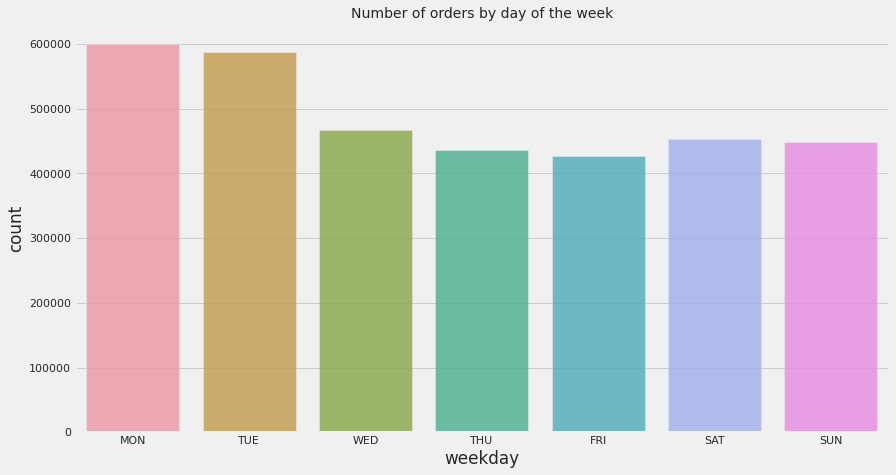

In [14]:
plt.figure(figsize=(13,7))
plt.title("Number of orders by day of the week", fontsize=14)
sns.countplot(x="order_dow", data=orders_df, alpha=0.8)
plt.xticks(ticks= range(0,7),labels=["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"])
plt.xlabel("weekday")
plt.show()

As we can see, Monday and Tuesday there were siginifcantly more orders than the rest of the week. Let's see how this 

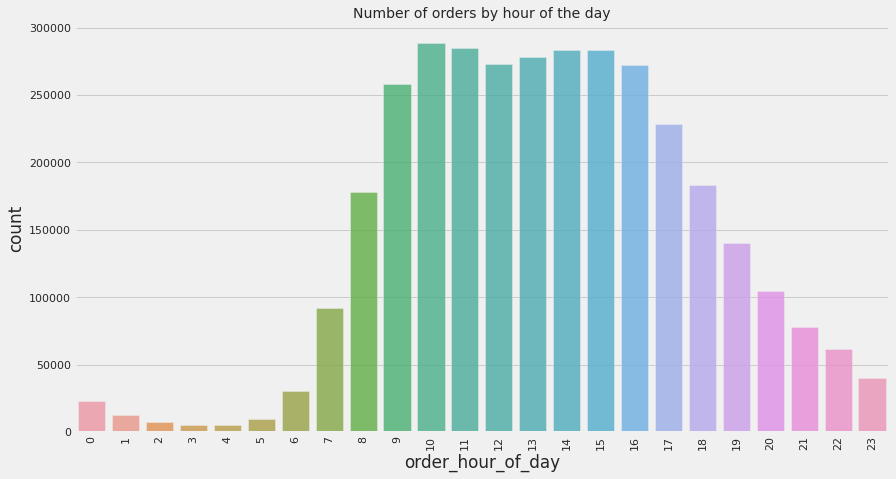

In [15]:
plt.figure(figsize=(13,7))
plt.title("Number of orders by hour of the day", fontsize=14)
sns.countplot(x="order_hour_of_day", data=orders_df, alpha=0.8)
plt.xticks(rotation=90)
plt.show()

Lokking at the time of the orders we cann see, that most of the orders happend between 09:00 and 17:00.

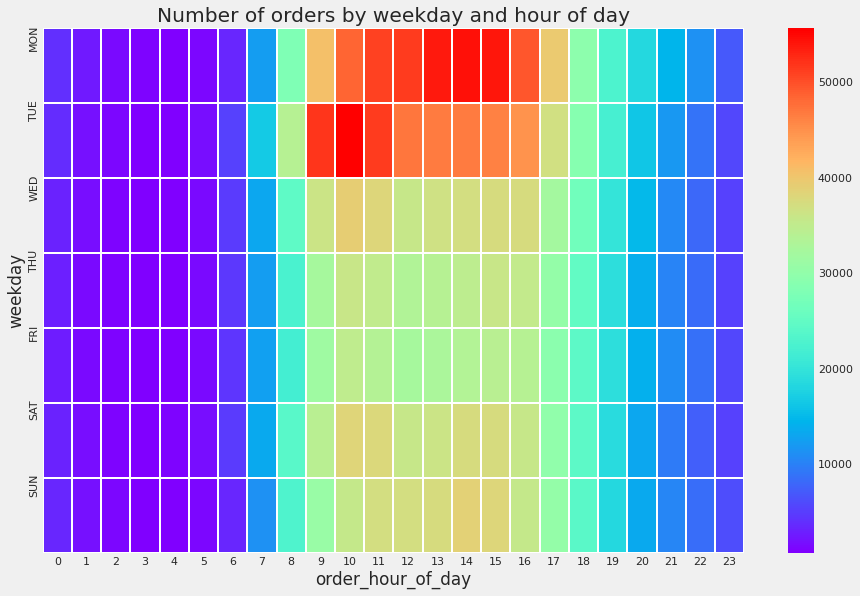

In [16]:
plt.figure(figsize=(14,9))
sns.heatmap(orders_df.groupby(['order_dow', 'order_hour_of_day']).size().unstack(fill_value=0), cmap="rainbow", linewidth=1)
plt.title("Number of orders by weekday and hour of day")
plt.yticks(ticks= range(0,7),labels=["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"])
plt.ylabel("weekday")
plt.show()

As we already could see in the single graphs, we can see in the heatmap above more clearly. The most orders happend on Monday between 10:00 and 16:00 and on Tuesday beteen 09:00 and 13:00

### 1.2.3

In [18]:
products_df

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [19]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


There are a total of 49688 unique products. Let's explore how these products are distributed with regard to the departments and aisles. As The original products dataframe only containts department_ids and aisles_ids, let's first extend the df with the additional, qualitative information form the other dataframes

In [20]:
extended_products_df = products_df.merge(departments_df, on="department_id")
extended_products_df = extended_products_df.merge(aisles_df, on="aisle_id")

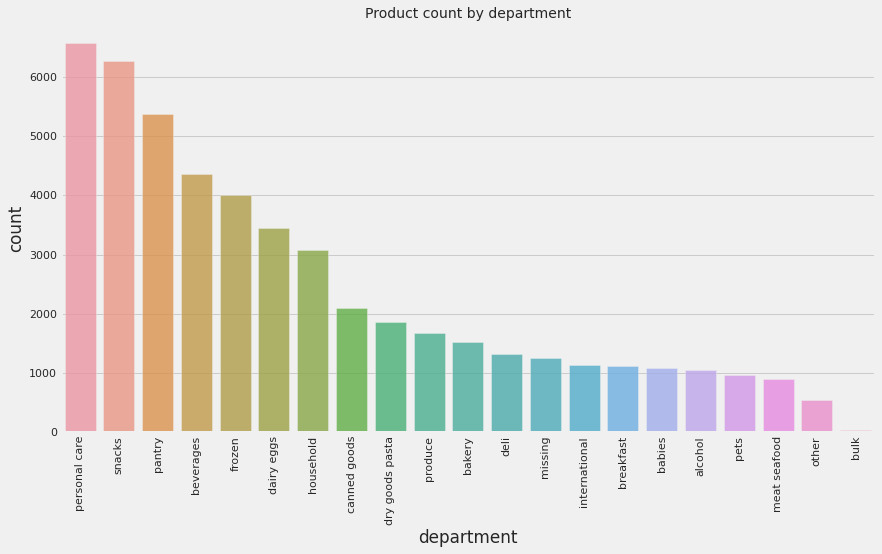

In [21]:
plt.figure(figsize=(13,7))
plt.title("Product count by department", fontsize=14)
sns.countplot(x="department", data=extended_products_df, order=extended_products_df.department.value_counts().index, alpha=0.8)
plt.xticks(rotation=90)
plt.show()

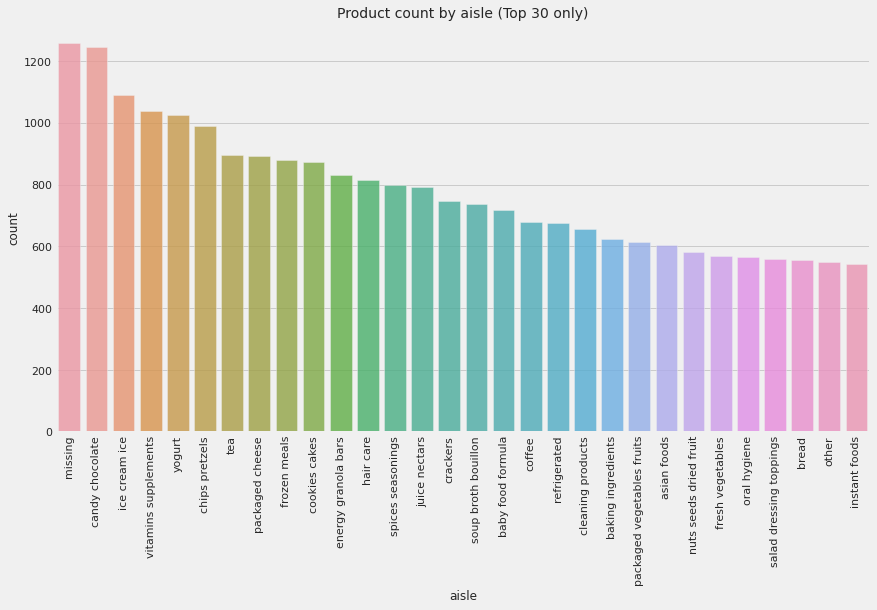

In [22]:
cnt_srs = extended_products_df["aisle"].value_counts().head(30)
plt.figure(figsize=(13,7))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.title("Product count by aisle (Top 30 only)", fontsize=14)
plt.ylabel("count", fontsize=12)
plt.xlabel('aisle', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### 1.2.4 Aisles

In [23]:
aisles_df

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [24]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


There are a total of 135 different aisles

### 1.2.5 Departments

In [25]:
departments_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [26]:
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


There are a total of 21 departments

## 1.3 All orders

So far we looked at the single files and merged very few. In order to be able to explore the data in more depth, we need to merge our files together. We will also use this merged dataframe later for our modelling, as it containts all required information to solve our business problem

In [27]:
# Merging all the relevant files to create one big dataframe

all_orders = pd.concat([order_products_prior_df,order_products_train_df])
all_orders = all_orders.merge(orders_df[['order_id','user_id']], on='order_id', how='inner')
all_orders = all_orders.merge(products_df, on = 'product_id', how='inner')
all_orders = all_orders.merge(departments_df, on = 'department_id', how='inner')
all_orders = all_orders.merge(aisles_df, on = 'aisle_id', how='inner')


In [28]:
all_orders

,order_id,product_id,add_to_cart_order,reordered,user_id,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,202279,Organic Egg Whites,86,16,dairy eggs,eggs
1,26,33120,5,0,153404,Organic Egg Whites,86,16,dairy eggs,eggs
2,120,33120,13,0,23750,Organic Egg Whites,86,16,dairy eggs,eggs
3,327,33120,5,1,58707,Organic Egg Whites,86,16,dairy eggs,eggs
4,390,33120,28,1,166654,Organic Egg Whites,86,16,dairy eggs,eggs
...,...,...,...,...,...,...,...,...,...,...
33819101,2909991,18001,5,0,80613,Dried Porcini Mushroom,6,2,other,other
33819102,3016581,46404,1,1,132609,Cotes De Provence Rose,6,2,other,other
33819103,3326955,46404,1,0,132609,Cotes De Provence Rose,6,2,other,other
33819104,3340423,46404,3,0,103807,Cotes De Provence Rose,6,2,other,other


In [29]:
all_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int64 
 3   reordered          int64 
 4   user_id            int64 
 5   product_name       object
 6   aisle_id           int64 
 7   department_id      int64 
 8   department         object
 9   aisle              object
dtypes: int64(7), object(3)
memory usage: 2.8+ GB


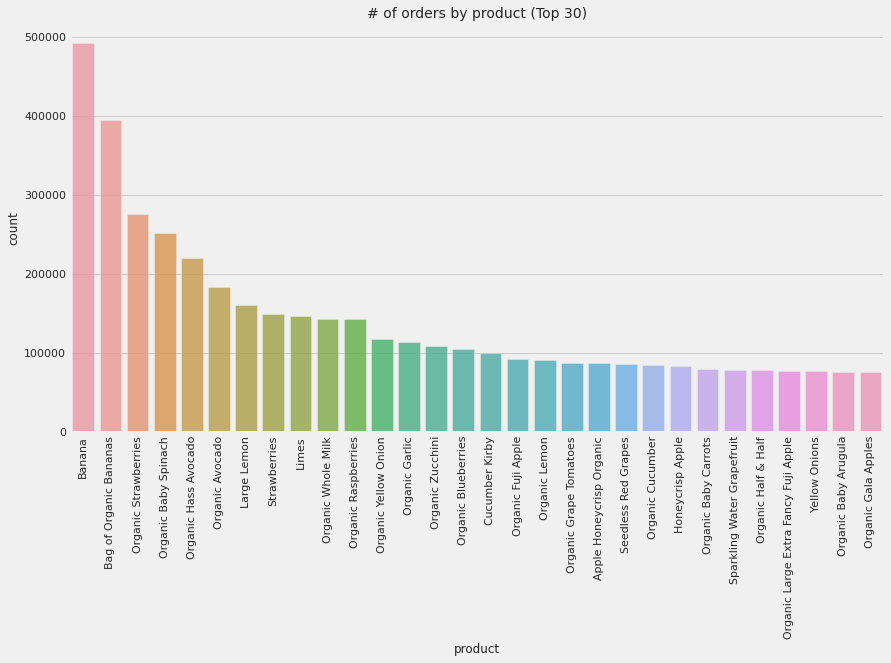

In [30]:
cnt_srs = all_orders["product_name"].value_counts().head(30)
plt.figure(figsize=(13,7))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.title("# of orders by product (Top 30)", fontsize=14)
plt.ylabel("count", fontsize=12)
plt.xlabel('product', fontsize=12)
plt.xticks(rotation=90)
plt.show()

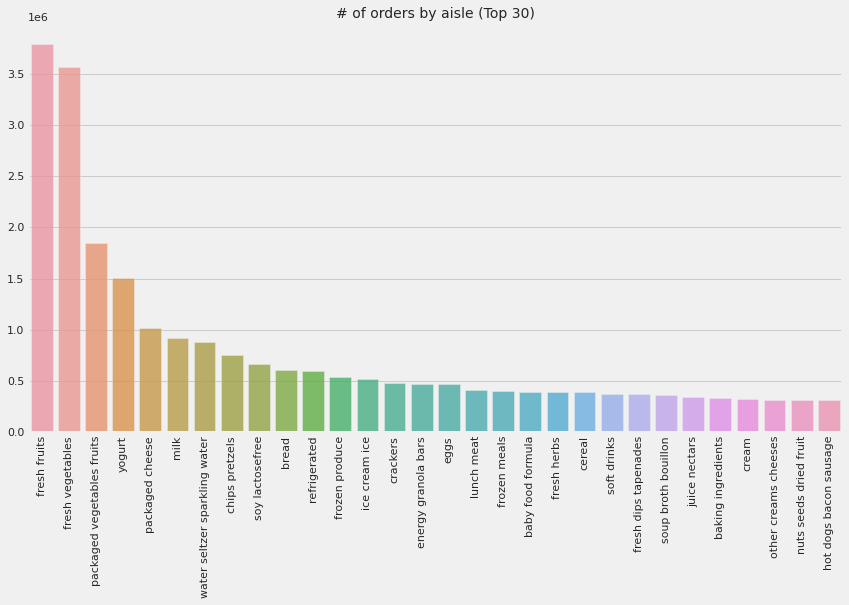

In [31]:
cnt_srs = all_orders["aisle"].value_counts().head(30)
plt.figure(figsize=(13,7))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.title("# of orders by aisle (Top 30)", fontsize=14)
plt.xticks(rotation=90)
plt.show()

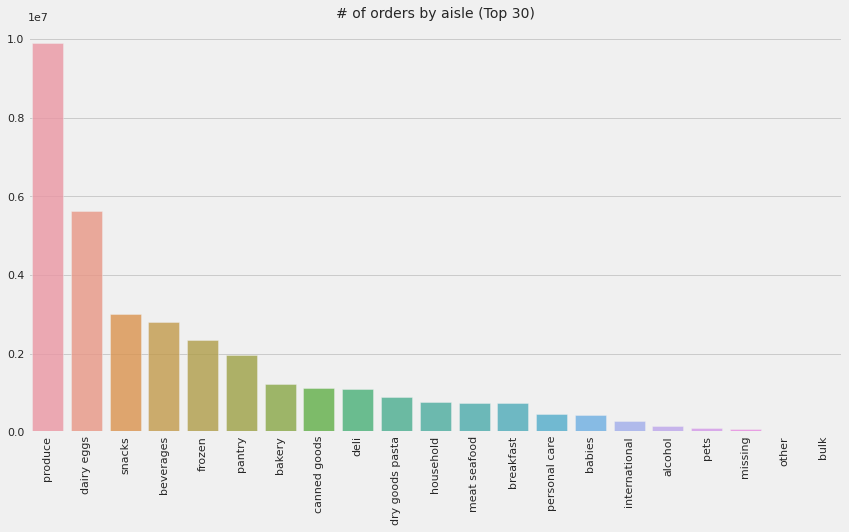

In [32]:
cnt_srs = all_orders["department"].value_counts().head(30)
plt.figure(figsize=(13,7))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.title("# of orders by aisle (Top 30)", fontsize=14)
plt.xticks(rotation=90)
plt.show()

/home/lmo/anaconda3/envs/instacart/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


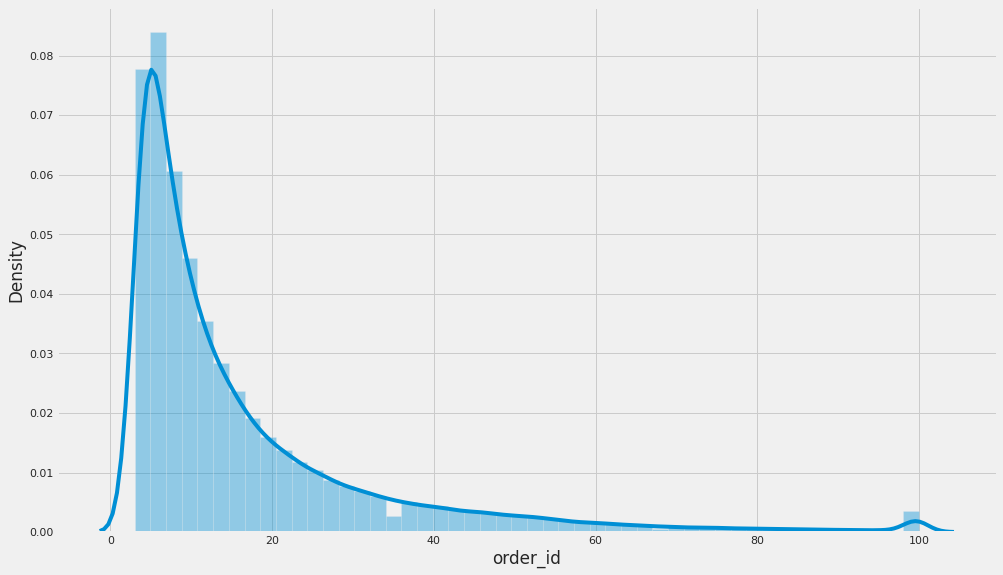

In [33]:
plt.figure(figsize=(15,9))
sns.distplot(all_orders.groupby("user_id")["order_id"].nunique())
plt.show()


/home/lmo/anaconda3/envs/instacart/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_since_prior_order', ylabel='Density'>

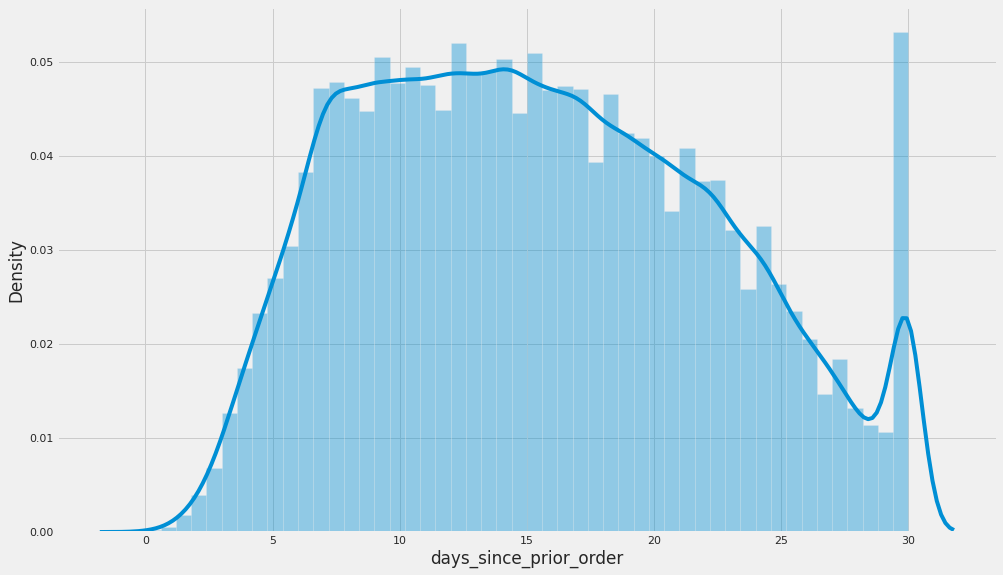

In [34]:
plt.figure(figsize=(15,9))
sns.distplot(orders_df.groupby('user_id')['days_since_prior_order'].mean())